In [48]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

# 目标
- 理解什么是等高线。
- 计算和绘制等高线。
- 涉及函数：**cv2.findContours()**，**cv2.drawContrours()**。

# 1. 什么是等高线
等高线是具有相同颜色或亮度的像素连接而成的一条连续曲线。等高线对于形状分析、目标检测和识别非常有用。
- 使用二值图像会得到更精确的结果，因此在计算等高线之前，先用阈值或Canny边缘检测处理图像。
- **cv2.findContours()**会修改原始图像，因此如果后面还要使用原始图像，需要将其存储到其他变量中。
- 在OpenCV中，寻找等高线的操作类似于从黑色背景中找出白色的目标。因此要注意，要寻找的目标需要为白色，背景为黑色。

下面的代码演示了如何在二值图像中寻找等值线：

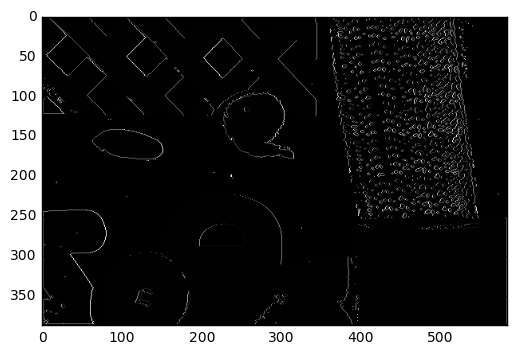

In [49]:
im = cv2.imread('../data/rubberwhale1.png')
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

plt.imshow(thresh, cmap='gray')

**cv2.findContours()**函数需要三个参数，第一个是原图像，第二个是等高线提取的方式，第三个是等高线近似方法。返回的值中，**contours**是一个Python列表，包含了目标所有等值点的坐标。

> **注意**  
> 在后面的教程中将讨论第二个和第三个参数。到目前为止，上面代码中给出的参数值对于所有图像都能得到很好的结果。

# 2. 如何绘制等高线
可以用**cv2.drawContours()**函数来绘制等高线，该函数也可以根据提供的边界点来绘制任意形状。第一个参数是原图像，第二个参数是封装在Python列表中的等值点坐标，第三个参数是等值线的索引（对于绘制独立的等值线非常有用，要绘制所有等值线该参数设置为1），其余的参数是颜色、粗细等。

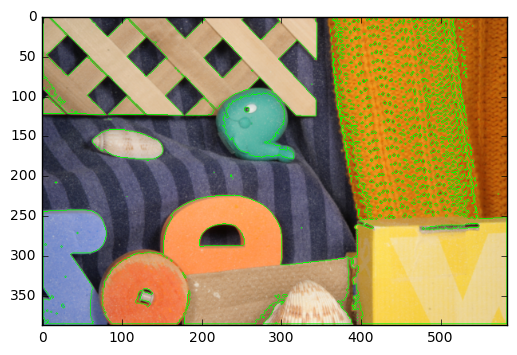

In [50]:
# 绘制所有的等值线
dst = cv2.drawContours(im.copy(), contours, -1, (0, 255, 0), 1)

plt.imshow(dst[:, :, ::-1], 'gray')

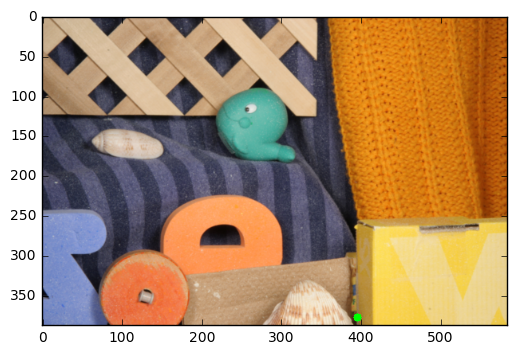

In [59]:
# 绘制第4条等值线
dst = cv2.drawContours(im.copy(), contours, 1, (0, 255, 0), 10)

plt.imshow(dst[:, :, ::-1], 'gray')

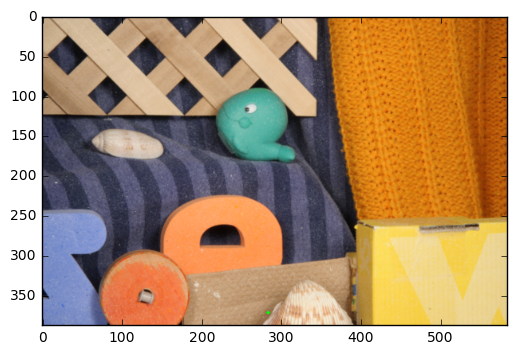

In [60]:
# 大部分情况下，下面的用法更为普遍
cnt = contours[4]
dst = cv2.drawContours(im.copy(), [cnt], 0, (0, 255, 0), 3)

plt.imshow(dst[:, :, ::-1])

> **注意**  
> 最后两个方法的效果是相同的，但在后面的例子中会发现第二个方法更为有用。

# 3. 等值线近似方法
**cv2.findContours()**函数的第三个参数，用于指定近似方法。在前面，我们介绍过等值点是形状的边界，它们具有相同的亮度。该函数保存形状边界的坐标，但是是否存储全部的坐标，由等值线近似方法参数指定。

如果使用**cv2.CHAIN_APPROX_NONE**，所有的边界点都会被存储。但是实际上我们可能并不需要所有的点，例如一条直线上的所有等值点。这种情况下，只需要两个点就可以表示这条线段。这就是**cv2.CHAIN_APPROX_SIMPLE**的工作方式。该方法移除冗余点，起到压缩等值点以节省内存。

下面的图像中，左图使用了**cv2.CHAIN_APPROX_NONE**，共包含734个点。右边的图像使用了**cv2.CHAIN_APPROX_SIMPLE**，只需要4个点。这将大量的节省内存。
![](./imgs/contours_01.jpg)